<a href="https://colab.research.google.com/github/robonesky/oreilly/blob/main/RM%20Lab%20Notes%2010%20202301%20cohort.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, GridSearchCV, TimeSeriesSplit, cross_val_score

from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import precision_recall_curve, roc_curve# , ROCCurveDisplay #, ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score, roc_auc_score, auc
from sklearn.metrics import classification_report, confusion_matrix

import warnings
warnings.filterwarnings ('ignore')

In [4]:
df = pd.read_csv('./spy.csv', index_col=0, parse_dates=True)

df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
1996-05-08,63.671875,64.781250,63.078125,64.781250,41.272911,1694700
1996-05-09,64.562500,65.062500,64.500000,64.734375,41.243053,593400
1996-05-10,65.375000,65.593750,65.062500,65.375000,41.651173,925100
1996-05-13,65.531250,66.640625,65.468750,66.359375,42.278339,867500
1996-05-14,66.625000,66.937500,66.562500,66.765625,42.537167,632300


In [5]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,6293.000000,6293.000000,6293.000000,6293.000000,6293.000000,6.293000e+03
mean,159.373806,160.332798,158.308242,159.373042,133.292492,9.558396e+07
std,71.731954,71.996933,71.438268,71.748354,79.402662,9.699401e+07
min,61.937500,63.187500,60.375000,62.656250,40.130543,2.016000e+05
25%,112.019997,112.599998,111.156250,111.889999,80.180862,2.772080e+07
50%,133.125000,133.875000,132.156250,133.156250,98.580070,6.903300e+07
75%,200.020004,201.000000,198.740005,200.020004,177.175781,1.323469e+08
max,420.320007,422.820007,419.160004,422.119995,422.119995,8.710263e+08


In [6]:
df.isnull().sum()

Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [8]:
df['O-C'] = df['Open'] - df['Close']
df['H-L'] = df['High'] - df['Low']

# This returns an ndarray
X = df[
    ['O-C', 'H-L']
].values

In [9]:
y = np.where(
    # where T+1 > 0.995* T, populate an 'up', else a 'close'
    df['Adj Close'].shift(-1) > 0.995*df['Adj Close'],
    1,
    -1)

y

array([ 1,  1,  1, ...,  1,  1, -1])

In [10]:
pd.Series(y).value_counts()

 1    4755
-1    1538
dtype: int64

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, shuffle=False)

print(f'\nX_train is {X_train}, \nX_test is {X_test}, \ny_train is {y_train}, \ny_test is {y_test}')


X_train is [[-1.109375    1.703125  ]
 [-0.171875    0.5625    ]
 [ 0.          0.53125   ]
 ...
 [-0.01998901  1.43000793]
 [ 0.58999634  1.50999451]
 [-1.66000366  1.88999939]], 
X_test is [[-0.31999207  1.03999329]
 [-1.72999573  1.83000183]
 [ 1.41000366  2.03999329]
 ...
 [ 1.63000488  2.48001099]
 [-3.24002075  5.52999878]
 [-2.22998047  3.66000366]], 
y_train is [1 1 1 ... 1 1 1], 
y_test is [ 1 -1  1 ...  1  1 -1]


In [13]:
model = Pipeline([
    ('scaler', MinMaxScaler()),
    ('classifier', KNeighborsClassifier())
])

model.fit(X_train, y_train)

Pipeline(steps=[('scaler', MinMaxScaler()),
                ('classifier', KNeighborsClassifier())])

In [14]:
y_pred = model.predict(X_test)

y_proba = model.predict_proba(X_test)

acc_train = accuracy_score(y_train, model.predict(X_train))
acc_test = accuracy_score(y_test, y_pred)

print(f'Train Accuracy: {acc_train:0.4}, Test Accuracy: {acc_test:0.4}')

Train Accuracy: 0.7757, Test Accuracy: 0.7284


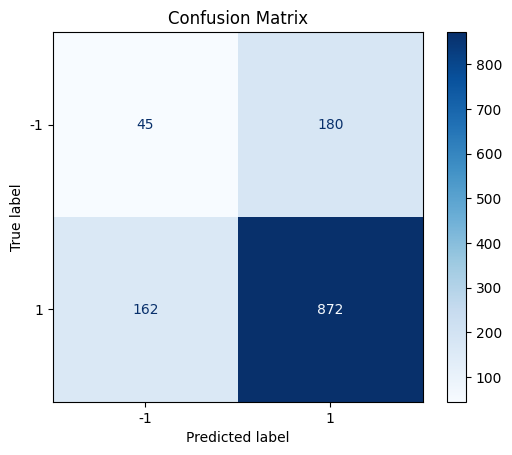

In [16]:
from sklearn.metrics import ConfusionMatrixDisplay
disp = ConfusionMatrixDisplay.from_estimator(
    model,
    X_test,
    y_test,
    display_labels = model.classes_,
    cmap = plt.cm.Blues
)
disp.ax_.set_title('Confusion Matrix')
plt.show()